# Convolution

In [ ]:
import numpy as np
import scipy

a = np.array([1, 2, 3, 4, 5, 6, 7])
b = np.array([1, 2, 3])
print(np.convolve(a, b, 'full'))  # M + N - 1
print(np.convolve(a, b, 'same'))  # max(M,N)
print(np.convolve(a, b, 'valid'))  # max(M,N) - min(M,N) + 1, when overlap completely

print(scipy.signal.convolve(a, b, mode='full', method='fft'))
print(scipy.signal.convolve(a, b, mode='same', method='fft'))
print(scipy.signal.convolve(a, b, mode='valid', method='direct'))

# Correlate

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7])
b = np.array([1, 2, 3])
print(np.correlate(a, b, 'full'))  # M + N - 1
print(scipy.signal.correlate(a, b, mode='full', method='fft'))

# Corr Coefficient

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from numpy.random import default_rng

rng = default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(100), x])

# numpy
print(np.corrcoef(np.arange(0, 6, 1), np.arange(6, 0, -1)))  # Corr Coefficient matrix

# scipy
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")  # get lags for the result of correlation
plt.plot(correlation)
plt.plot(lags)

lag = lags[np.argmax(correlation)]
print(np.argmax(correlation))
print(lag)  # y is the 'delayed' version of x, latency = 100

# 设计滤波器
## FIR滤波器

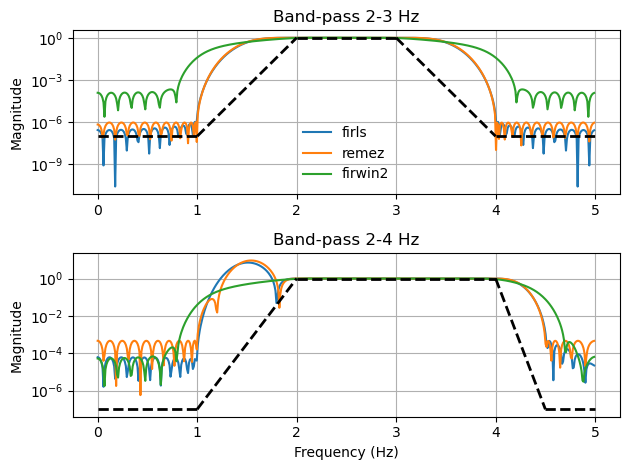

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
fs = 10.0  # Hz
desired = (0, 0, 1, 1, 0, 0)
for bi, bands in enumerate(((0, 1, 2, 3, 4, 5), (0, 1, 2, 4, 4.5, 5))):
    fir_firls = signal.firls(73, bands, desired, fs=fs)
    fir_remez = signal.remez(73, bands, desired[::2], fs=fs)
    fir_firwin2 = signal.firwin2(73, bands, desired, fs=fs)
    hs = list()
    ax = axs[bi]
    for fir in (fir_firls, fir_remez, fir_firwin2):
        freq, response = signal.freqz(fir)
        hs.append(ax.semilogy(0.5*fs*freq/np.pi, np.abs(response))[0])
    for band, gains in zip(zip(bands[:-1], bands[1:]),
                           zip(desired[:-1], desired[1:])):
        ax.semilogy(band, np.maximum(gains, 1e-7), 'k--', linewidth=2)
    if bi == 0:
        ax.legend(hs, ('firls', 'remez', 'firwin2'),
                  loc='lower center', frameon=False)
    else:
        ax.set_xlabel('Frequency (Hz)')
    ax.grid(True)
    ax.set(title='Band-pass %d-%d Hz' % bands[2:4], ylabel='Magnitude')

fig.tight_layout()
plt.show()

# 寻找峰值

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()


ModuleNotFoundError: No module named 'scipy.datasets'